# Import & Set Variables

In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical


from keras.models import Sequential
from keras.layers import Dense, Dropout

import keras

from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

%matplotlib inline

# dataset file name
fname = "cow.csv"

# normal values
NORMAL_TEMPERATURE = 37.8
NORMAL_PULSE = (30, 40)
NORMAL_RESPIRATORY_RATE = (8, 10)
NORMAL_NASOGASTRIC_REFLUX_PH = (3, 4)
NORMAL_PACKED_CELL_VOLUME = (30, 50)
NORMAL_TOTAL_PROTEIN = (6, 7.5)
NORMAL_ABDOMO_APPEARANCE = "clear"

---

# Load Data

In [46]:
df = pd.read_csv(fname)
df

,surgery,age,hospital_number,temperature,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome Class,surgical_lesion,lesion
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208


---

# Preprocess Data

In [47]:
df['surgery'] = df['surgery'].map({"yes" : 1, "no" : 2})
df['age'] = df['age'].map({"adult" : 1, "young" : 2})
df = df.drop(columns=['hospital_number'])
df['temperature'] = df['temperature'].replace(np.nan, NORMAL_TEMPERATURE)
df['pulse'] = df['pulse'].replace(np.nan, np.mean(NORMAL_PULSE))
df['respiratory_rate'] = df['respiratory_rate'].replace(np.nan, np.mean(NORMAL_RESPIRATORY_RATE))
df['temp_of_extremities'] = df['temp_of_extremities'].map({"normal" : 1, "warm" : 2, "cool": 3, "cold": 4, np.nan: 0})
df['peripheral_pulse'] = df['peripheral_pulse'].map({"normal" : 1, "increased" : 2, "reduced": 3, "absent": 4, np.nan: 0})
df['mucous_membrane'] = df['mucous_membrane'].map({"normal_pink": 1 , "bright_pink": 2, "pale_pink": 3, "pale_cyanotic": 4, "bright_red": 5, "dark_cyanotic": 6, np.nan: 0})
df['capillary_refill_time'] = df['capillary_refill_time'].map({"less_3_sec":1, "3": 2, "more_3_sec": 2, np.nan: 0})
df['pain'] = df['pain'].map({"alert": 1, "depressed": 2, "mild_pain": 3, "severe_pain": 4, "extreme_pain": 5, np.nan: 0})
df['peristalsis'] = df['peristalsis'].map({"hypermotile": 1, "normal": 2, "hypomotile": 3, "absent": 4, np.nan: 0})
df['abdominal_distention'] = df['abdominal_distention'].map({"none": 1, "slight": 2, "moderate": 3, "severe": 4, np.nan: 0})
df['nasogastric_tube'] = df['nasogastric_tube'].map({"none": 1, "slight": 2, "significant": 3, np.nan: 0})
df['nasogastric_reflux'] = df['nasogastric_reflux'].map({"none": 1, "less_1_liter": 2, "more_1_liter": 3, np.nan: 0})
df['nasogastric_reflux_ph'] = df['nasogastric_reflux_ph'].replace(np.nan, np.mean(NORMAL_NASOGASTRIC_REFLUX_PH))
df['rectal_exam_feces'] = df['rectal_exam_feces'].map({"normal": 1, "increased": 2, "decreased": 3, "absent": 4, np.nan: 0})
df['abdomen'] = df['abdomen'].map({"normal": 1, "other": 2, "firm": 3, "distend_small": 4, "distend_large": 5, np.nan: 0})
df['packed_cell_volume'] = df['packed_cell_volume'].replace(np.nan, np.mean(NORMAL_PACKED_CELL_VOLUME))
df['total_protein'] = df['total_protein'].replace(np.nan, np.mean(NORMAL_TOTAL_PROTEIN))
df['abdomo_appearance'] = df['abdomo_appearance'].map({"clear": 1, "cloudy": 2, "serosanguious": 3, np.nan: 0})
df = df.drop(columns=["abdomo_protein"])
df['surgical_lesion'] = df['surgical_lesion'].map({"yes": 1, "no": 2, np.nan: 0})
df['outcome Class'] = df['outcome Class'].map({"lived": 0, "died": 1, "euthanized": 2})
df = df.drop(columns=["lesion"])

df = df.reset_index(drop=True)

df_y = df['outcome Class']
df = df.drop(columns="outcome Class", axis=1)
df_X = df

In [48]:
df_X

,surgery,age,temperature,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,surgical_lesion
0,2,1,38.5,66.0,28.0,3,3,0,2,5,...,4,0,0,3.5,3,5,45.0,8.40,0,2
1,1,1,39.2,88.0,20.0,0,0,4,1,3,...,2,0,0,3.5,4,2,50.0,85.00,2,2
2,2,1,38.3,40.0,24.0,1,1,3,1,3,...,1,0,0,3.5,1,1,33.0,6.70,0,2
3,1,2,39.1,164.0,84.0,4,1,6,2,2,...,4,1,2,5.0,3,0,48.0,7.20,3,1
4,2,1,37.3,104.0,35.0,0,0,6,2,0,...,0,0,0,3.5,0,0,74.0,7.40,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,1,37.8,120.0,70.0,4,0,4,2,2,...,0,0,0,3.5,0,5,55.0,65.00,0,2
295,2,1,37.2,72.0,24.0,3,2,4,2,4,...,3,3,1,3.5,4,4,44.0,6.75,3,1
296,1,1,37.5,72.0,30.0,4,3,4,1,4,...,3,2,1,3.5,3,5,60.0,6.80,0,1
297,1,1,36.5,100.0,24.0,3,3,3,1,3,...,3,3,1,3.5,4,4,50.0,6.00,3,1


In [49]:
df_y

0      1
1      2
2      0
3      1
4      1
      ..
294    2
295    2
296    1
297    0
298    2
Name: outcome Class, Length: 299, dtype: int64

In [50]:
X = df_X.values
y = df_y.values

In [51]:
X, y

(array([[ 2. ,  1. , 38.5, ...,  8.4,  0. ,  2. ],
        [ 1. ,  1. , 39.2, ..., 85. ,  2. ,  2. ],
        [ 2. ,  1. , 38.3, ...,  6.7,  0. ,  2. ],
        ...,
        [ 1. ,  1. , 37.5, ...,  6.8,  0. ,  1. ],
        [ 1. ,  1. , 36.5, ...,  6. ,  3. ,  1. ],
        [ 1. ,  1. , 37.2, ..., 62. ,  1. ,  2. ]]),
 array([1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2,
        2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0,
        0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1,
        1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0,
        0, 0,

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

---

# Training Models

## Non-ensemble

### Neural Network

In [53]:
nn_model = Sequential([
    Dense(24, activation="relu", input_shape=X[0].shape),
    Dense(8, activation="relu"),
    Dense(3, activation="softmax"),
])

nn_model.compile(loss="categorical_crossentropy", 
                 metrics=[
                     "accuracy",
                     keras.metrics.Precision()
                     ])

nn_model.fit(X_train, to_categorical(y_train, 3), epochs=60, shuffle=True, verbose=False)
y_pred_nn = np.argmax(nn_model.predict(X_test), axis=1)

3/3 [==============================] - 0s 682us/step


In [54]:
nn_model_acc = accuracy_score(y_test, y_pred_nn)
nn_model_prec = precision_score(y_test, y_pred_nn, average=None)
nn_model_f1 = f1_score(y_test, y_pred_nn, average=None)
nn_model_recall = recall_score(y_test, y_pred_nn, average=None)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [56]:
knn_model_acc = accuracy_score(y_test, y_pred_knn)
knn_model_prec = precision_score(y_test, y_pred_knn, average=None)
knn_model_f1 = f1_score(y_test, y_pred_knn, average=None)
knn_model_recall = recall_score(y_test, y_pred_knn, average=None)

## Ensemble

### Random Forest

In [57]:
rfc_model = RandomForestClassifier(n_estimators=1000)
rfc_model.fit(X_train, y_train)
y_pred_rf = rfc_model.predict(X_test)

In [58]:
rfc_model_acc = accuracy_score(y_test, y_pred_rf)
rfc_model_prec = precision_score(y_test, y_pred_rf, average=None)
rfc_model_f1 = f1_score(y_test, y_pred_rf, average=None)
rfc_model_recall = recall_score(y_test, y_pred_rf, average=None)

### AdaBoost

In [59]:
ada_model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=1000)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

In [60]:
ada_model_acc = accuracy_score(y_test, y_pred_ada)
ada_model_prec = precision_score(y_test, y_pred_ada, average=None)
ada_model_f1 = f1_score(y_test, y_pred_ada, average=None)
ada_model_recall = recall_score(y_test, y_pred_ada, average=None)

### Bagging

In [61]:
bag_model = BaggingClassifier(SVC(), n_estimators=1000)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

In [62]:
bag_model_acc = accuracy_score(y_test, y_pred_bag)
bag_model_prec = precision_score(y_test, y_pred_bag, average=None)
bag_model_f1 = f1_score(y_test, y_pred_bag, average=None)
bag_model_recall = recall_score(y_test, y_pred_bag, average=None)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

# Visualisation

## Accuracy

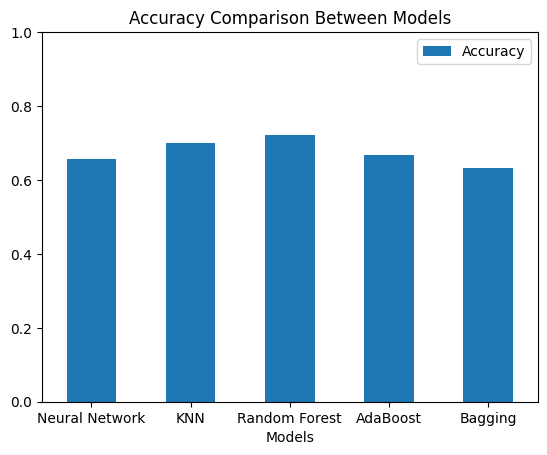

In [63]:
df = pd.DataFrame({'Models':['Neural Network', 'KNN', 'Random Forest', "AdaBoost", "Bagging"], 'Accuracy':[nn_model_acc, knn_model_acc, rfc_model_acc, ada_model_acc, bag_model_acc]})
ax = df.plot.bar(x='Models', y='Accuracy', rot=0, ylim=(0, 1), title="Accuracy Comparison Between Models")

## Precision

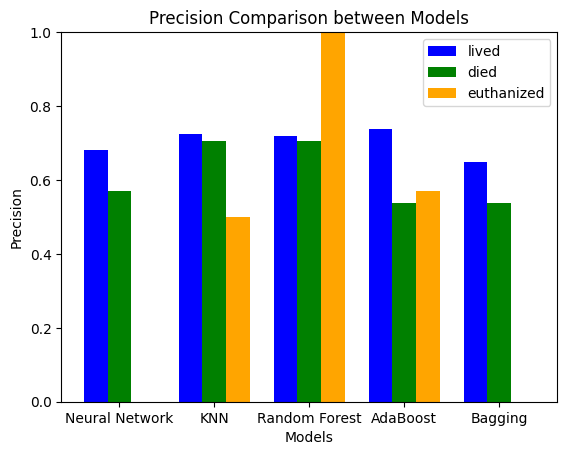

In [64]:
precs = [nn_model_prec, knn_model_prec, rfc_model_prec, ada_model_prec, bag_model_prec]
ind = np.arange(len(precs))
width = 0.25

class_0 = [nn_model_prec[0], knn_model_prec[0], rfc_model_prec[0], ada_model_prec[0], bag_model_prec[0]]
bar1 = plt.bar(ind, class_0, width, color = 'blue')
  
class_1 = [nn_model_prec[1], knn_model_prec[1], rfc_model_prec[1], ada_model_prec[1], bag_model_prec[1]]
bar2 = plt.bar(ind+width, class_1, width, color='g')
  
class_2 = [nn_model_prec[2], knn_model_prec[2], rfc_model_prec[2], ada_model_prec[2], bag_model_prec[2]]
bar3 = plt.bar(ind+width*2, class_2, width, color = 'orange')
  
plt.xlabel("Models")
plt.ylabel('Precision')
plt.title("Precision Comparison between Models")
plt.ylim((0, 1))
  
plt.xticks(ind+width,['Neural Network', 'KNN', 'Random Forest', "AdaBoost", "Bagging"])
plt.legend( (bar1, bar2, bar3), ("lived", "died", "euthanized") )
plt.show()

## F1

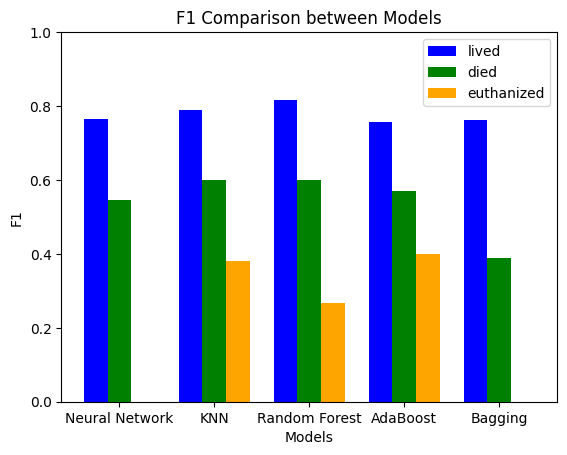

In [65]:
f1 = [nn_model_f1, knn_model_f1, rfc_model_f1, ada_model_f1, bag_model_f1]
ind = np.arange(len(f1))
width = 0.25

class_0 = [nn_model_f1[0], knn_model_f1[0], rfc_model_f1[0], ada_model_f1[0], bag_model_f1[0]]
bar1 = plt.bar(ind, class_0, width, color = 'blue')
  
class_1 = [nn_model_f1[1], knn_model_f1[1], rfc_model_f1[1], ada_model_f1[1], bag_model_f1[1]]
bar2 = plt.bar(ind+width, class_1, width, color='g')
  
class_2 = [nn_model_f1[2], knn_model_f1[2], rfc_model_f1[2], ada_model_f1[2], bag_model_f1[2]]
bar3 = plt.bar(ind+width*2, class_2, width, color = 'orange')
  
plt.xlabel("Models")
plt.ylabel('F1')
plt.title("F1 Comparison between Models")
plt.ylim((0, 1))
  
plt.xticks(ind+width,['Neural Network', 'KNN', 'Random Forest', "AdaBoost", "Bagging"])
plt.legend( (bar1, bar2, bar3), ("lived", "died", "euthanized") )
plt.show()

## Recall

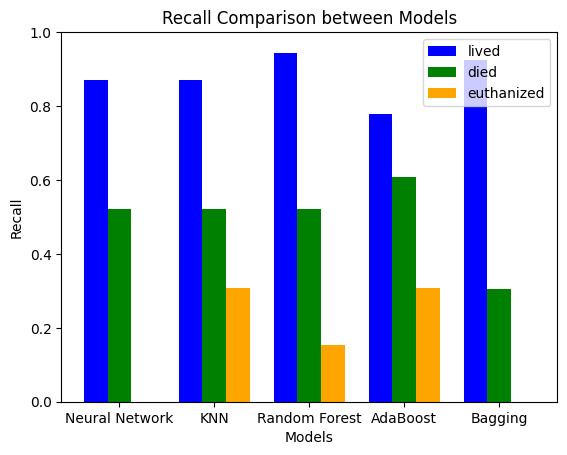

In [66]:
recall = [nn_model_recall, knn_model_recall, rfc_model_recall, ada_model_recall, bag_model_recall]
ind = np.arange(len(recall))
width = 0.25

class_0 = [nn_model_recall[0], knn_model_recall[0], rfc_model_recall[0], ada_model_recall[0], bag_model_recall[0]]
bar1 = plt.bar(ind, class_0, width, color = 'blue')
  
class_1 = [nn_model_recall[1], knn_model_recall[1], rfc_model_recall[1], ada_model_recall[1], bag_model_recall[1]]
bar2 = plt.bar(ind+width, class_1, width, color='g')
  
class_2 = [nn_model_recall[2], knn_model_recall[2], rfc_model_recall[2], ada_model_recall[2], bag_model_recall[2]]
bar3 = plt.bar(ind+width*2, class_2, width, color = 'orange')
  
plt.xlabel("Models")
plt.ylabel('Recall')
plt.title("Recall Comparison between Models")
plt.ylim((0, 1))
  
plt.xticks(ind+width,['Neural Network', 'KNN', 'Random Forest', "AdaBoost", "Bagging"])
plt.legend( (bar1, bar2, bar3), ("lived", "died", "euthanized") )
plt.show()

---